In [58]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_com_target = pd.read_csv('df_train.csv', index_col = False)

In [3]:
pd.set_option('display.max_rows', None)

## MÉTRICAS

In [ ]:
df_com_target

In [5]:
len(df_com_target)

76020

In [ ]:
print(df_com_target.describe())

In [ ]:
df_com_target.columns

In [ ]:
df_com_target['TARGET'].agg(['sum'])

In [ ]:
3008 / 76020 

In [ ]:
# plot settings
plt.style.use('ggplot')
sns.set_style('dark')

# define variable with PCA columns (V1, V2, V3, ..., V28)
pca_columns = df_com_target.drop(['ID', 'TARGET'], axis=1).columns

class_0 = df_com_target[df_com_target.TARGET == 0]
class_1 = df_com_target[df_com_target.TARGET == 1]

# number of plots per figure
plots_per_figure = 12  # for a 4x3 subplot grid
num_cols = 4  # number of columns in the subplot grid
num_rows = plots_per_figure // num_cols  # number of rows in the subplot grid

# iterate over features, creating a new figure for each batch of `plots_per_figure` features
for i in range(0, len(pca_columns), plots_per_figure):
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 8))
    fig.subplots_adjust(hspace=1, wspace=1)
    
    # subset of features for this figure
    subset_pca_columns = pca_columns[i:i+plots_per_figure]
    
    # iterate over subset of features
    for idx, col in enumerate(subset_pca_columns, start=1):
        # only plot when variance > 0 for both classes
        if class_0[col].var() > 0 and class_1[col].var() > 0:  
            plt.subplot(num_rows, num_cols, idx)
            sns.kdeplot(class_0[col], fill=True, color='b')
            sns.kdeplot(class_1[col], fill=True, color='r')

    plt.tight_layout()
    plt.show()


## SPLIT SAMPLE

In [6]:
x = df_com_target.drop(['ID','TARGET'], axis = 1)
y = df_com_target['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 42)

## FEATURE SELECTION

In [104]:
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)

importances = model.feature_importances_

feature_importances = pd.DataFrame({"feature": x_train.columns, "importance": importances})
feature_importances = feature_importances.sort_values("importance", ascending = False)

print(feature_importances)

                           feature    importance
368                          var38  3.478507e-01
1                            var15  2.027209e-01
329         saldo_medio_var5_hace3  3.035022e-02
331          saldo_medio_var5_ult3  2.995631e-02
326                 num_var45_ult3  2.171138e-02
324                num_var45_hace3  1.992724e-02
323                num_var45_hace2  1.580484e-02
328         saldo_medio_var5_hace2  1.560689e-02
182                    saldo_var30  1.552129e-02
277                 num_var22_ult3  1.463078e-02
190                    saldo_var42  1.357600e-02
330          saldo_medio_var5_ult1  1.346479e-02
164                     saldo_var5  1.273691e-02
275                num_var22_hace3  1.114747e-02
325                 num_var45_ult1  1.049995e-02
279             num_med_var45_ult3  1.039610e-02
274                num_var22_hace2  1.037475e-02
193                          var36  9.388949e-03
289       num_meses_var39_vig_ult3  8.520339e-03
276                 

In [105]:
feature_importances.to_csv('csv.csv')

In [87]:
list_acima_1perc = [
    'var38',
    'var15',
    'saldo_medio_var5_hace3',
    'saldo_medio_var5_ult3',
    'num_var45_ult3',
    'num_var45_hace3',
    'num_var45_hace2',
    'saldo_medio_var5_hace2',
    'saldo_var30',
    'num_var22_ult3',
    'saldo_var42',
    'saldo_medio_var5_ult1',
    'saldo_var5',
    'num_var22_hace3',
    'num_var45_ult1',
    'num_med_var45_ult3',
    'num_var22_hace2',
]

lista_top2 = [
    'var38',
    'var15'
]

In [106]:
teste = [
    'var38',
    'var15',
    'saldo_medio_var5_hace3',
    'saldo_medio_var5_ult3',
    'num_var45_ult3',
    'num_var45_hace3',
    'num_var45_hace2',
    'saldo_medio_var5_hace2',
    'saldo_var30',
    'num_var22_ult3',
    'saldo_var42',
    'saldo_medio_var5_ult1',
    'saldo_var5',
    'num_var22_hace3',
    'num_var45_ult1',
    'num_med_var45_ult3',
    'num_var22_hace2',
    'var36',
    'num_meses_var39_vig_ult3',
    'num_var22_ult1',
    'num_meses_var5_ult3',
    'num_var35',
    'num_med_var22_ult3',
    'imp_op_var39_ult1',
    'imp_trans_var37_ult1',
    'ind_var30',
    'imp_op_var41_comer_ult3',
    'var3',
    'imp_op_var39_comer_ult3',
    'imp_op_var39_efect_ult3',
    'imp_op_var41_ult1',
    'num_op_var41_ult3',
    'imp_op_var41_efect_ult3',
    'saldo_var37',
    'num_var4',
    'num_var30',
    'imp_op_var41_efect_ult1',
    'num_op_var39_ult3',
    'num_op_var41_hace2',
    'imp_op_var39_comer_ult1',

]

## FUNÇÃO DE OTIMIZAÇÃO

In [122]:
def maximize_profit_threshold(y_true, y_proba, tp_gain, fp_cost):
    best_threshold = 0
    best_profit = 0

    # Percorra diferentes valores de limiar
    for threshold in np.arange(0, 1.01, 0.0001):
        y_pred = (y_proba > threshold).astype(int)
        fp = np.sum((y_pred == 1) & (y_true == 0))  # Falsos positivos
        tp = np.sum((y_pred == 1) & (y_true == 1))  # Verdadeiros positivos
        profit = tp * tp_gain - fp * fp_cost

        # Verifique se o lucro atual é o melhor até agora
        if profit > best_profit:
            best_profit = profit
            best_threshold = threshold

    return best_threshold, best_profit

## REGRESSÃO LOGÍSTICA

In [85]:
# Crie uma instância do modelo
logreg_full = LogisticRegression(solver = 'liblinear', max_iter = 10000, random_state = 42)

# Ajuste o modelo aos dados de treinamento
logreg_full.fit(x_train, y_train)

# Faça previsões para os dados de teste
y_pred_proba_full = logreg_full.predict_proba(x_test)[:, 1]  # Probabilidades

In [86]:
best_threshold, best_profit = maximize_profit_threshold(y_test, y_pred_proba_full, tp_gain = 90, fp_cost = 10)
print(f"The best threshold is {best_threshold} with a profit of {best_profit}")

The best threshold is 0.377 with a profit of 630


In [89]:
# Crie uma instância do modelo
logreg_acima_1perc = LogisticRegression(solver = 'liblinear', max_iter = 10000, random_state = 42)

# Ajuste o modelo aos dados de treinamento
logreg_acima_1perc.fit(x_train[[*list_acima_1perc]], y_train)

# Faça previsões para os dados de teste
y_pred_proba_acima_1perc = logreg_acima_1perc.predict_proba(x_test[[*list_acima_1perc]])[:, 1]  # Probabilidades

In [90]:
best_threshold, best_profit = maximize_profit_threshold(y_test, y_pred_proba_acima_1perc, tp_gain = 90, fp_cost = 10)
print(f"The best threshold is {best_threshold} with a profit of {best_profit}")

The best threshold is 0.28500000000000003 with a profit of 70


In [91]:
# Crie uma instância do modelo
logreg_acima_lista_top2 = LogisticRegression(solver = 'liblinear', max_iter = 10000, random_state = 42)

# Ajuste o modelo aos dados de treinamento
logreg_acima_lista_top2.fit(x_train[[*lista_top2]], y_train)

# Faça previsões para os dados de teste
y_pred_proba_acima_lista_top2 = logreg_acima_lista_top2.predict_proba(x_test[[*lista_top2]])[:, 1]  # Probabilidades

In [92]:
best_threshold, best_profit = maximize_profit_threshold(y_test, y_pred_proba_acima_lista_top2, tp_gain = 90, fp_cost = 10)
print(f"The best threshold is {best_threshold} with a profit of {best_profit}")

The best threshold is 0.273 with a profit of 30


## XGBOOST

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo Gradient Boosting
model_xgboost = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# Treinar o modelo
model_xgboost.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgboost = model_xgboost.predict(x_test)
y_pred_proba_xgboost = model_xgboost.predict_proba(x_test)[:, 1]

In [117]:
best_threshold, best_profit = maximize_profit_threshold(y_test, y_pred_proba_xgboost, tp_gain = 90, fp_cost = 10)
print(f"The best threshold is {best_threshold} with a profit of {best_profit}")

The best threshold is 0.089 with a profit of 48740


In [164]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo Gradient Boosting
model_xgboost_1perc = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# Treinar o modelo
model_xgboost_1perc.fit(x_train[[*list_acima_1perc]], y_train)

# Fazer previsões no conjunto de teste
y_pred_xgboost_1perc = model_xgboost_1perc.predict(x_test[[*list_acima_1perc]])
y_pred_proba_xgboost_1perc = model_xgboost_1perc.predict_proba(x_test[[*list_acima_1perc]])[:, 1]

In [165]:
best_threshold, best_profit = maximize_profit_threshold(y_test, y_pred_proba_xgboost_1perc, tp_gain = 90, fp_cost = 10)
print(f"The best threshold is {best_threshold} with a profit of {best_profit}")

The best threshold is 0.085 with a profit of 46840


In [195]:
y_pred_xgboost_1perc = model_xgboost_1perc.predict(x_train[[*list_acima_1perc]])
y_pred_proba_xgboost_1perc = model_xgboost_1perc.predict_proba(x_train[[*list_acima_1perc]])[:, 1]

x_train_2 = x_train

x_train_2['prob_insatisfeito'] = y_pred_proba_xgboost_1perc

In [196]:
y_pred_xgboost_1perc = model_xgboost_1perc.predict(x_test[[*list_acima_1perc]])
y_pred_proba_xgboost_1perc = model_xgboost_1perc.predict_proba(x_test[[*list_acima_1perc]])[:, 1]

x_test_2 = x_test

x_test_2['prob_insatisfeito'] = y_pred_proba_xgboost_1perc

In [218]:
y_pred_com_target = model_xgboost_1perc.predict(df_com_target[[*list_acima_1perc]])
y_pred_proba_com_target = model_xgboost_1perc.predict_proba(df_com_target[[*list_acima_1perc]])[:, 1]

df_com_target_2 = df_com_target

df_com_target_2['prob_insatisfeito'] = y_pred_proba_com_target

## ATRIBUIÇÃO DO RATING

In [223]:
def assign_rating(df, threshold, prob_col):
    # Atribua o rating 1 para clientes com prob_insatisfeito maior que threshold
    df['rating'] = (df[prob_col] > threshold).astype(int)
    
    # Para os clientes restantes, classifique-os em ordem decrescente de 'prob_insatisfeito'
    remaining = df[df['rating'] == 0].sort_values(by=prob_col, ascending=False)

    # Divida o número restante de clientes por 4 para determinar o número de clientes em cada grupo de rating
    group_size = len(remaining) // 4

    # Atribua os ratings de 2 a 5 para cada grupo de clientes
    for i in range(4):
        start = i * group_size
        if i < 3:
            # Para os primeiros 3 grupos, atribua o rating respectivo aos próximos 'group_size' clientes
            end = start + group_size
            remaining.iloc[start:end, df.columns.get_loc('rating')] = 2 + i
        else:
            # Para o último grupo, atribua o rating aos clientes restantes
            remaining.iloc[start:, df.columns.get_loc('rating')] = 5

    # Juntamos de volta no DataFrame
    df.loc[remaining.index, 'rating'] = remaining['rating']
    
    return df

# Aplicando a função no seu DataFrame
df = assign_rating(df_com_target_2, threshold=0.085, prob_col='prob_insatisfeito')


In [ ]:
df_com_target_3.T

## DBSCAN

In [6]:
x = df_com_target.drop(['ID','TARGET'], axis = 1)
y = df_com_target['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 42)

In [226]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder

# Aplicando o DBSCAN nos dados
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan.fit(x_train)

x_train_2 = x_train
# Adicionando os rótulos dos clusters ao DataFrame original
x_train_2['cluster'] = dbscan.labels_

In [228]:
x_train_2.T

,53158,34018,34974,23726,42769,67810,41077,26592,53557,44945,...,67221,41090,16023,60263,44131,37194,6265,54886,860,15795
var3,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
var15,34.000000,25.000000,39.000000,29.000000,37.000000,35.000000,33.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,24.000000,23.000000,24.000000,42.000000,23.000000,27.000000,17.00000,24.000000
imp_ent_var16_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var39_comer_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,580.350000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var39_comer_ult3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,939.240000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_comer_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_comer_ult3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_efect_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_efect_ult3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [230]:
max(x_train_2['cluster'].values)

76

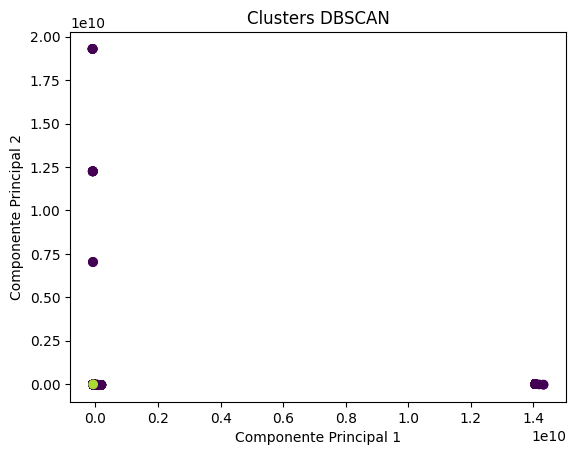

In [229]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(x_train_2)

# Plot dos clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = dbscan.labels_, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters DBSCAN')
plt.show()

In [228]:
x_train_2.T

,53158,34018,34974,23726,42769,67810,41077,26592,53557,44945,...,67221,41090,16023,60263,44131,37194,6265,54886,860,15795
var3,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
var15,34.000000,25.000000,39.000000,29.000000,37.000000,35.000000,33.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,24.000000,23.000000,24.000000,42.000000,23.000000,27.000000,17.00000,24.000000
imp_ent_var16_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var39_comer_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,580.350000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var39_comer_ult3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,939.240000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_comer_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_comer_ult3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_efect_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_efect_ult3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
imp_op_var40_ult1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [230]:
max(x_train_2['cluster'].values)

76

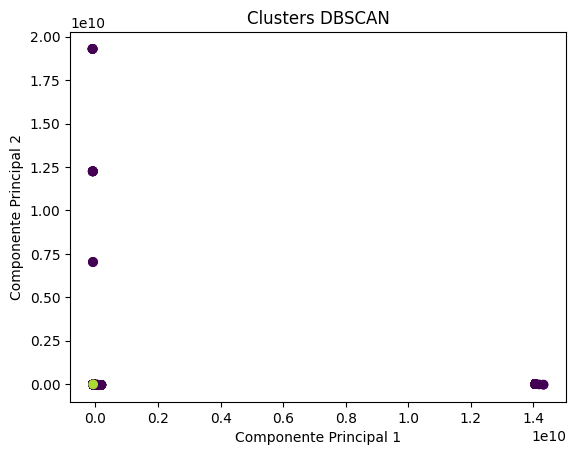

In [229]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(x_train_2)

# Plot dos clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = dbscan.labels_, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters DBSCAN')
plt.show()